In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


sst_data_path = 'sst.mnmean.nc'
mslp_data_path = 'mslp_coarse.nc'

# Charger les données avec xarray
sst_ds = xr.open_dataset(sst_data_path)
mslp_ds = xr.open_dataset(mslp_data_path)

# Vérifier la structure des données
print(sst_ds)
print(mslp_ds)

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 475, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [2]:
# Affiche les dimensions, variables et attributs
sst_ds.info()
mslp_ds.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 475 ;
	nbnds = 2 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = Latitude ;
		lat:actual_range = [ 89.5 -89.5] ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [  0.5 359.5] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:coordinate_defines = center ;
	float32 sst(time, lat, lon) ;
		sst:long_name = Monthly Mean of Sea Surface Temperature ;
		sst:unpacked_valid_range = [-5. 40.] ;
		sst:actual_range = [-1.7999996 35.56862  ] ;
		sst:units = degC ;
		sst:precision = 2 ;
		sst:var_desc = Sea Surface Temperature ;
		sst:dataset = NOAA Optimum Interpolation (OI) SST V2 ;
		sst:level_desc = Surface ;
		sst:statistic = Mean ;
		sst:parent_stat = Weekly Mean ;
		sst:standard_name = sea_surface_temperature ;
		sst:cell_methods = time: mean (monthly fr

In [3]:
# Accéder aux données SST (Sea Surface Temperature)
sst_data = sst_ds['sst']

# Accéder aux données MSLP (Mean Sea Level Pressure)
mslp_data = mslp_ds['msl']


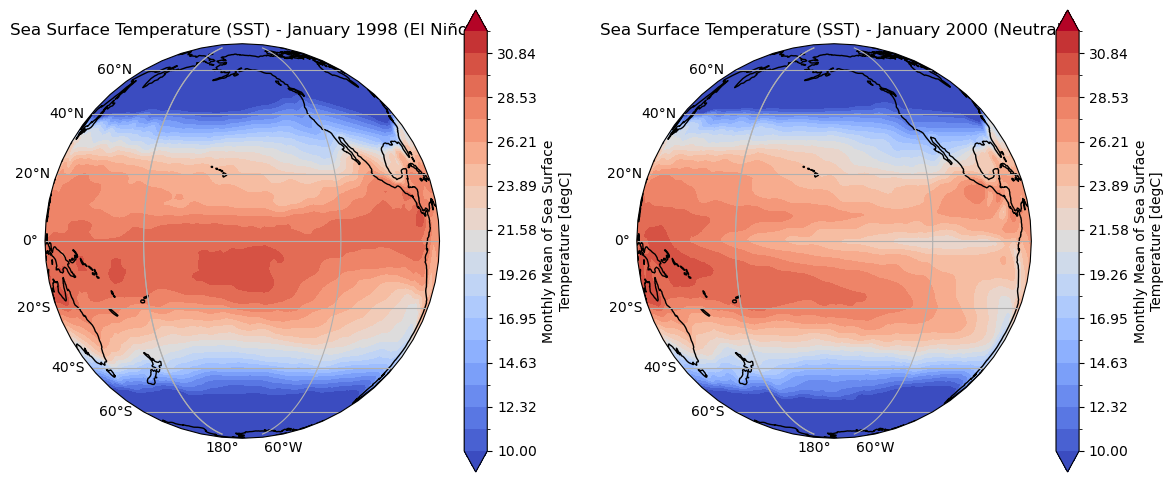

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Charger les données SST pour janvier 1998 (El Niño) et janvier 2000 (Neutre)
sst_el_nino = sst_ds.sst.sel(time="1998-01-01")
sst_neutral = sst_ds.sst.sel(time="2000-01-01")

# Configuration du plot
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection=ccrs.Orthographic(-150, 0)), figsize=(14, 6))

# Plot pour l'année El Niño
p1 = sst_el_nino.plot.contourf(ax=axs[0], levels=20, cmap="coolwarm", transform=ccrs.PlateCarree(), extend='both', vmin=10, vmax=32)
axs[0].set_title("Sea Surface Temperature (SST) - January 1998 (El Niño)")
axs[0].coastlines()
gl1 = axs[0].gridlines(draw_labels=True)
gl1.top_labels = False
gl1.right_labels = False

# Plot pour l'année neutre
p2 = sst_neutral.plot.contourf(ax=axs[1], levels=20, cmap="coolwarm", transform=ccrs.PlateCarree(), extend='both', vmin=10, vmax=32)
axs[1].set_title("Sea Surface Temperature (SST) - January 2000 (Neutral)")
axs[1].coastlines()
gl2 = axs[1].gridlines(draw_labels=True)
gl2.top_labels = False
gl2.right_labels = False

plt.show()


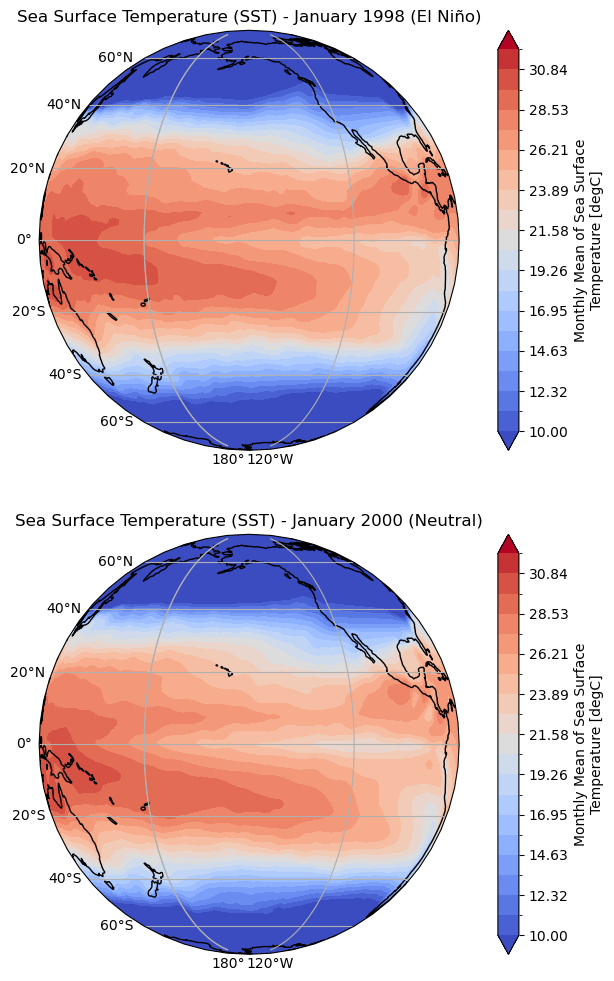

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Charger les données SST pour janvier 1998 (El Niño) et janvier 2000 (Neutre)
sst_el_nino = sst_ds.sst.sel(time="1981-12-01")
sst_neutral = sst_ds.sst.sel(time="2000-01-01")

# Configuration du plot pour une disposition verticale
fig, axs = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.Orthographic(-150, 0)), figsize=(10, 12))

# Plot pour l'année El Niño
p1 = sst_el_nino.plot.contourf(ax=axs[0], levels=20, cmap="coolwarm", transform=ccrs.PlateCarree(), extend='both', vmin=10, vmax=32)
axs[0].set_title("Sea Surface Temperature (SST) - January 1998 (El Niño)")
axs[0].coastlines()
gl1 = axs[0].gridlines(draw_labels=True)
gl1.top_labels = False
gl1.right_labels = False

# Plot pour l'année neutre
p2 = sst_neutral.plot.contourf(ax=axs[1], levels=20, cmap="coolwarm", transform=ccrs.PlateCarree(), extend='both', vmin=10, vmax=32)
axs[1].set_title("Sea Surface Temperature (SST) - January 2000 (Neutral)")
axs[1].coastlines()
gl2 = axs[1].gridlines(draw_labels=True)
gl2.top_labels = False
gl2.right_labels = False
plt.savefig("SST_El_Nino_and_Neutral.png", dpi=300, bbox_inches='tight')
plt.show()


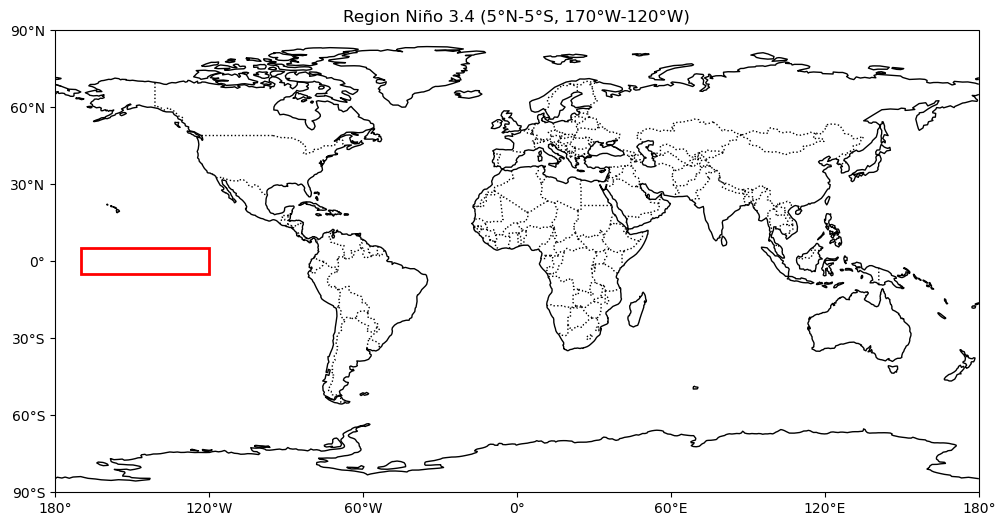

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.patches as patches

# Charger les données SST depuis un fichier local NetCDF (si nécessaire)
# sst_ds = xr.open_dataset('chemin/vers/sst.mnmean.nc')  # Remplacez par le chemin de votre fichier

# Définition de la zone Niño 3.4 (5°N-5°S, 170°W-120°W)
nino_lat_min, nino_lat_max = -5, 5
nino_lon_min, nino_lon_max = 190, 240  # Longitudes en format 0-360°E

# Configuration de la figure avec projection PlateCarree pour le planisphère
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()

# Ajouter les côtes et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la zone Niño 3.4 avec un rectangle
nino34_box = patches.Rectangle(xy=[nino_lon_min, nino_lat_min], width=nino_lon_max - nino_lon_min,
                               height=nino_lat_max - nino_lat_min, linewidth=2, edgecolor='red', facecolor='none',
                               transform=ccrs.PlateCarree())
ax.add_patch(nino34_box)

# Ajouter les labels pour les axes
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# Titre
plt.title("Region Niño 3.4 (5°N-5°S, 170°W-120°W)")
plt.savefig("El_Nino_Index_3.4.png", dpi=300, bbox_inches='tight')
plt.show()


In [40]:
print(sst_ds)

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 475, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

<xarray.DataArray 'sst' (time: 475, lat: 10, lon: 50)>
array([[[28.349998, 28.279999, 28.22    , ..., 26.56    , 26.67    ,
         26.73    ],
        [27.99    , 27.88    , 27.88    , ..., 26.09    , 26.189999,
         26.21    ],
        [27.619999, 27.48    , 27.48    , ..., 25.49    , 25.539999,
         25.539999],
        ...,
        [27.72    , 27.57    , 27.57    , ..., 24.9     , 24.82    ,
         24.72    ],
        [28.07    , 27.96    , 27.96    , ..., 25.17    , 25.109999,
         25.039999],
        [28.5     , 28.39    , 28.32    , ..., 25.359999, 25.32    ,
         25.25    ]],

       [[28.32    , 28.449999, 28.57    , ..., 26.93    , 26.849998,
         26.779999],
        [28.09    , 28.21    , 28.269999, ..., 26.72    , 26.64    ,
         26.539999],
        [27.68    , 27.76    , 27.779999, ..., 26.269999, 26.24    ,
         26.189999],
...
        [28.59    , 28.57    , 28.58    , ..., 26.76    , 26.73    ,
         26.67    ],
        [28.779999, 28.74 

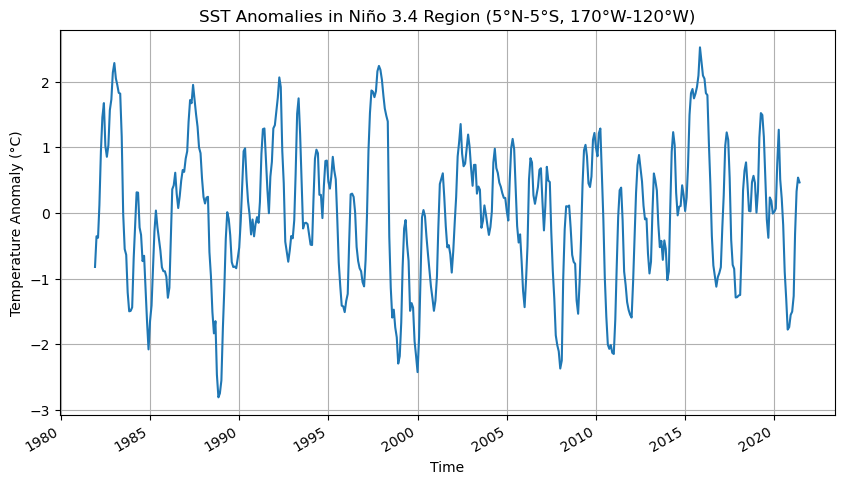

In [42]:
import xarray as xr
import matplotlib.pyplot as plt

sst_data_path = 'sst.mnmean.nc'
mslp_data_path = 'mslp_coarse.nc'

# Charger les données avec xarray
sst_ds = xr.open_dataset(sst_data_path)
mslp_ds = xr.open_dataset(mslp_data_path)

# Vérifier la structure des données
# print(sst_ds)
# print(mslp_ds)

# Charger les données SST depuis un fichier local NetCDF
# sst_ds = xr.open_dataset('chemin/vers/sst.mnmean.nc')  # Décommentez si nécessaire

# Convertir les longitudes de -180 à 180 en 0 à 360 (si nécessaire)
# sst_ds = sst_ds.assign_coords(lon=((sst_ds.lon + 360) % 360))

# Vérifier les plages de latitude et de longitude
# print("Latitudes:", sst_ds.lat.values)
# print("Longitudes:", sst_ds.lon.values)

# Définition de la région Niño 3.4 (5°N-5°S, 170°W-120°W en format 0-360°E)
nino_lat_min, nino_lat_max = -5, 5
nino_lon_min, nino_lon_max = 190, 240

# Extraction des anomalies de température dans la région Niño 3.4
# nino_sst = sst_ds.sst.sel(lon=slice(nino_lon_min, nino_lon_max), lat=slice(nino_lat_min, nino_lat_max))
nino_sst = sst_ds.sst.where(
    (sst_ds.lat >= nino_lat_min) & (sst_ds.lat <= nino_lat_max) &
    (sst_ds.lon >= nino_lon_min) & (sst_ds.lon <= nino_lon_max), drop=True
)
print(nino_sst)

# Calcul des anomalies
nino_sst_anomaly = nino_sst.mean(dim=["lat", "lon"]) - nino_sst.mean(dim=["lat", "lon"]).mean(dim="time")

# Plot de la série temporelle des anomalies (si des données valides sont présentes)
plt.figure(figsize=(10, 5))
nino_sst_anomaly.plot()
plt.title("SST Anomalies in Niño 3.4 Region (5°N-5°S, 170°W-120°W)")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()

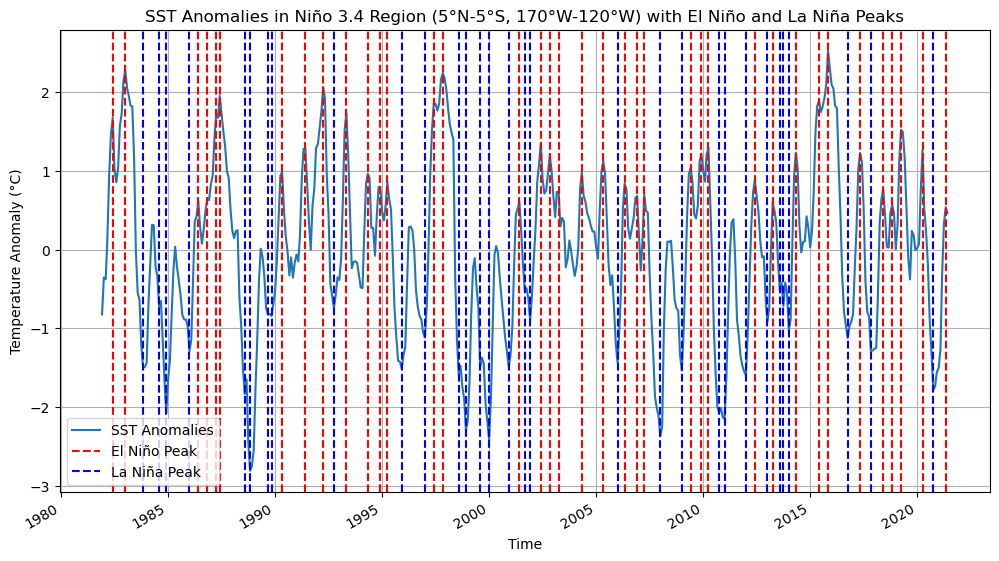

In [43]:
import xarray as xr
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load SST anomaly data (assuming `nino_sst_anomaly` is already calculated)
# nino_sst_anomaly = ...

# Find peaks for El Niño (positive anomalies) and La Niña (negative anomalies)
elnino_peaks, _ = find_peaks(nino_sst_anomaly, height=0.5)  # Positive peaks (El Niño events)
lanina_peaks, _ = find_peaks(-nino_sst_anomaly, height=0.5)  # Negative peaks (La Niña events)

# Plot the SST anomalies
plt.figure(figsize=(12, 6))
nino_sst_anomaly.plot(label="SST Anomalies")

# Add vertical lines for El Niño events
for peak in elnino_peaks:
    plt.axvline(nino_sst_anomaly.time[peak].values, color='red', linestyle='--', label='El Niño Peak' if peak == elnino_peaks[0] else "")

# Add vertical lines for La Niña events
for peak in lanina_peaks:
    plt.axvline(nino_sst_anomaly.time[peak].values, color='blue', linestyle='--', label='La Niña Peak' if peak == lanina_peaks[0] else "")

# Add plot labels
plt.title("SST Anomalies in Niño 3.4 Region (5°N-5°S, 170°W-120°W) with El Niño and La Niña Peaks")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()


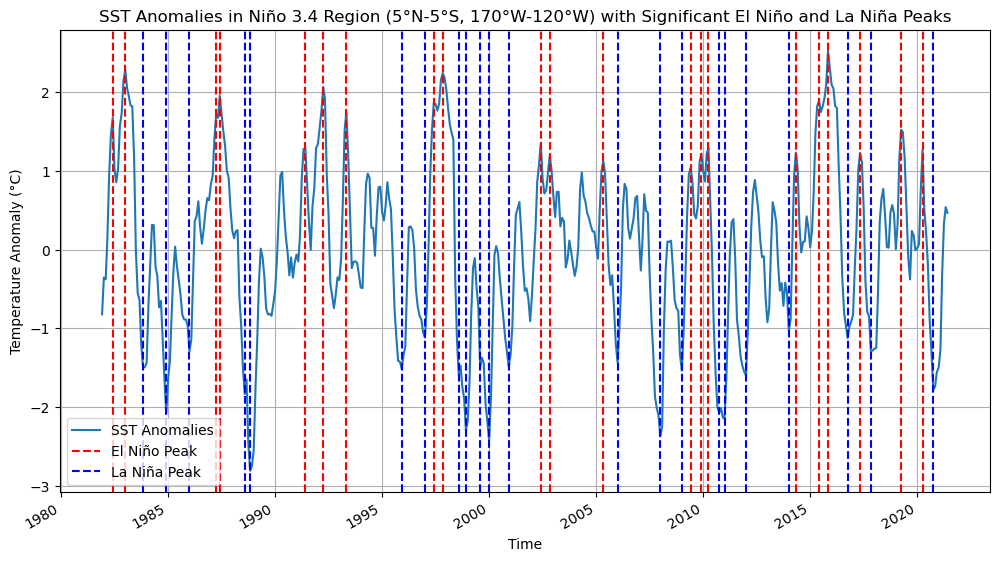

In [44]:
import xarray as xr
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming nino_sst_anomaly is already calculated and contains the SST anomalies

# Find peaks for El Niño (positive anomalies greater than 1°C)
elnino_peaks, _ = find_peaks(nino_sst_anomaly, height=1)  # Positive peaks with height > 1 (El Niño events)

# Find peaks for La Niña (negative anomalies less than -1°C)
lanina_peaks, _ = find_peaks(-nino_sst_anomaly, height=1)  # Negative peaks with height > 1 (La Niña events)

# Plot the SST anomalies
plt.figure(figsize=(12, 6))
nino_sst_anomaly.plot(label="SST Anomalies")

# Add vertical lines for El Niño events (positive peaks)
for peak in elnino_peaks:
    plt.axvline(nino_sst_anomaly.time[peak].values, color='red', linestyle='--', label='El Niño Peak' if peak == elnino_peaks[0] else "")

# Add vertical lines for La Niña events (negative peaks)
for peak in lanina_peaks:
    plt.axvline(nino_sst_anomaly.time[peak].values, color='blue', linestyle='--', label='La Niña Peak' if peak == lanina_peaks[0] else "")

# Add plot labels
plt.title("SST Anomalies in Niño 3.4 Region (5°N-5°S, 170°W-120°W) with Significant El Niño and La Niña Peaks")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()


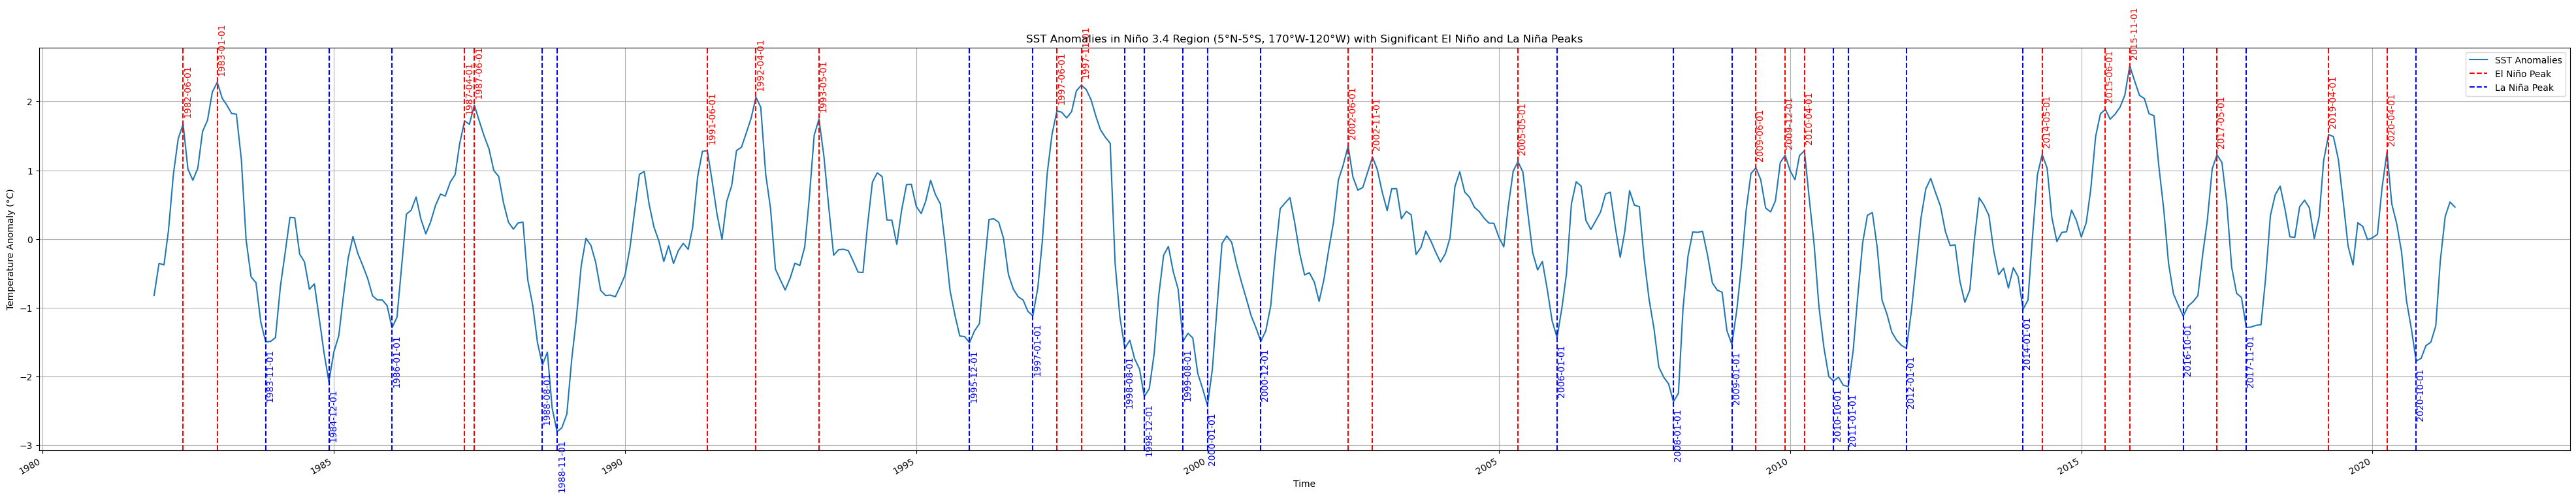

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming nino_sst_anomaly is already calculated and contains the SST anomalies

# Find peaks for El Niño (positive anomalies greater than 1°C)
elnino_peaks, _ = find_peaks(nino_sst_anomaly, height=1)  # Positive peaks with height > 1 (El Niño events)

# Find peaks for La Niña (negative anomalies less than -1°C)
lanina_peaks, _ = find_peaks(-nino_sst_anomaly, height=1)  # Negative peaks with height > 1 (La Niña events)

# Plot the SST anomalies
plt.figure(figsize=(50, 8))
nino_sst_anomaly.plot(label="SST Anomalies")

# Add vertical lines and annotations for El Niño events (positive peaks)
for peak in elnino_peaks:
    date = nino_sst_anomaly.time[peak].values
    plt.axvline(date, color='red', linestyle='--', label='El Niño Peak' if peak == elnino_peaks[0] else "")
    plt.text(date, nino_sst_anomaly[peak].values + 0.1, str(date)[:10], color='red', rotation=90, verticalalignment='bottom')

# Add vertical lines and annotations for La Niña events (negative peaks)
for peak in lanina_peaks:
    date = nino_sst_anomaly.time[peak].values
    plt.axvline(date, color='blue', linestyle='--', label='La Niña Peak' if peak == lanina_peaks[0] else "")
    plt.text(date, nino_sst_anomaly[peak].values - 0.1, str(date)[:10], color='blue', rotation=90, verticalalignment='top')

# Add plot labels
plt.title("SST Anomalies in Niño 3.4 Region (5°N-5°S, 170°W-120°W) with Significant El Niño and La Niña Peaks")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.savefig("Temperatures_anomalies.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
print("Latitudes near the equator:", sst_ds.lat.sel(lat=slice(-10, 10)).values)


Latitudes near the equator: []


In [36]:
print("Full latitude range in dataset:", sst_ds.lat.values)


Full latitude range in dataset: [ 89.5  88.5  87.5  86.5  85.5  84.5  83.5  82.5  81.5  80.5  79.5  78.5
  77.5  76.5  75.5  74.5  73.5  72.5  71.5  70.5  69.5  68.5  67.5  66.5
  65.5  64.5  63.5  62.5  61.5  60.5  59.5  58.5  57.5  56.5  55.5  54.5
  53.5  52.5  51.5  50.5  49.5  48.5  47.5  46.5  45.5  44.5  43.5  42.5
  41.5  40.5  39.5  38.5  37.5  36.5  35.5  34.5  33.5  32.5  31.5  30.5
  29.5  28.5  27.5  26.5  25.5  24.5  23.5  22.5  21.5  20.5  19.5  18.5
  17.5  16.5  15.5  14.5  13.5  12.5  11.5  10.5   9.5   8.5   7.5   6.5
   5.5   4.5   3.5   2.5   1.5   0.5  -0.5  -1.5  -2.5  -3.5  -4.5  -5.5
  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5
 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5
 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5
 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5
 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5
 -66.5 -67.5 -68.5 

In [37]:
nino_lat_min, nino_lat_max = -5.5, 5.5  # Slightly expanded range
nino_lon_min, nino_lon_max = 190, 240   # Longitude is already correct
nino_sst = sst_ds.sst.sel(lat=slice(nino_lat_min, nino_lat_max), lon=slice(nino_lon_min, nino_lon_max))
print(nino_sst)


<xarray.DataArray 'sst' (time: 475, lat: 0, lon: 50)>
[0 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 
  * lon      (lon) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-06-01
Attributes: (12/13)
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    ...                    ...
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]


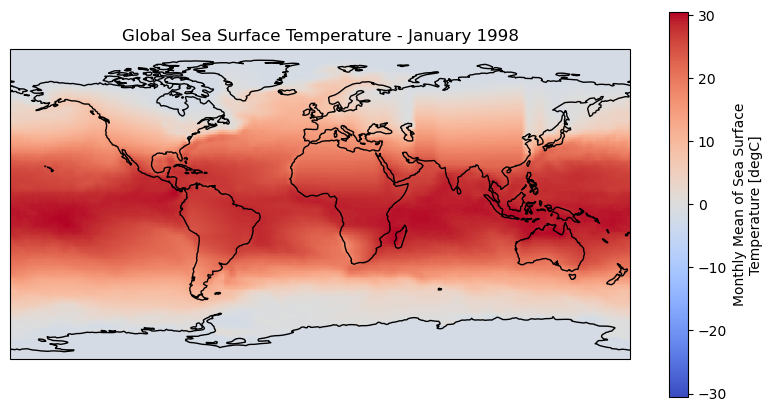

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
sst_ds.sst.sel(time="1998-01-01").plot(ax=ax, cmap="coolwarm", transform=ccrs.PlateCarree())
ax.set_title("Global Sea Surface Temperature - January 1998")
ax.coastlines()
plt.show()


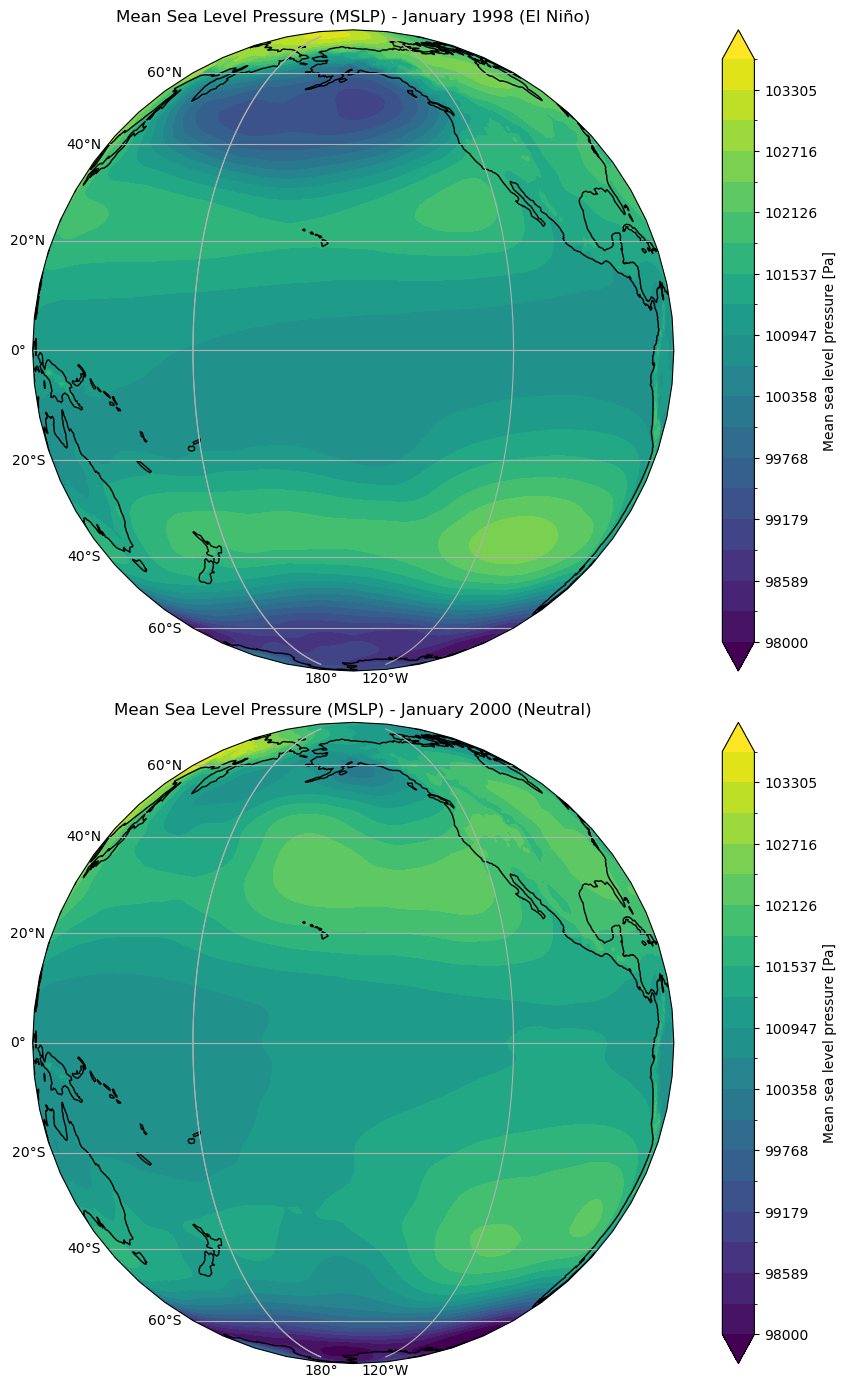

In [62]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load the MSLP dataset
mslp_ds = xr.open_dataset("mslp_coarse.nc")  # Replace with the path to your MSLP data file

# Select the MSLP data for the El Niño and Neutral years
mslp_el_nino = mslp_ds.msl.sel(time="1998-01-01")
mslp_neutral = mslp_ds.msl.sel(time="2000-01-01")

# Set up the plot configuration
fig, axs = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.Orthographic(-150, 0)), figsize=(10, 14))

# Plot for the El Niño year
p1 = mslp_el_nino.plot.contourf(
    ax=axs[0], levels=20, transform=ccrs.PlateCarree(), extend='both', vmin=98000, vmax=103600
)
axs[0].set_title("Mean Sea Level Pressure (MSLP) - January 1998 (El Niño)")
axs[0].coastlines()
gl1 = axs[0].gridlines(draw_labels=True)
gl1.top_labels = False
gl1.right_labels = False

# Plot for the Neutral year
p2 = mslp_neutral.plot.contourf(
    ax=axs[1], levels=20, transform=ccrs.PlateCarree(), extend='both', vmin=98000, vmax=103600
)
axs[1].set_title("Mean Sea Level Pressure (MSLP) - January 2000 (Neutral)")
axs[1].coastlines()
gl2 = axs[1].gridlines(draw_labels=True)
gl2.top_labels = False
gl2.right_labels = False

plt.tight_layout()
plt.savefig("pressure_el_Nino.png", dpi=300, bbox_inches='tight')
plt.show()
